# 8강 퀴즈

In [11]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 문제1
어느 병원에서는 정도가 비슷한 두통 환자 24명을 8명씩 나누고 세 가지 처방을 하여 고통 해소 시간을 측정하였다. 

그 결과 측정된 자료는 다음과 같다.

In [14]:
data = pd.DataFrame({
    "A" : [4.2, 2.3, 6.6, 6.1, 10.2, 11.7, 7.0, 3.6],
    "B" : [4.1, 10.7, 14.3, 10.4, 15.3, 11.5, 19.8, 12.6],
    "C" : [38.7, 26.3, 5.4, 10.3, 16.9, 43.1, 48.6, 29.5]
})

data = data.melt(var_name='treat', value_name='value')

#### 1-1) 위 자료에 대해 분산분석을 시행하라

In [12]:
fit1 = smf.ols('value~treat', data).fit()
sm.stats.anova_lm(fit1, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
treat,2.0,1856.475833,928.237917,10.090914,0.000849
Residual,21.0,1931.737500,91.987500,NaN,NaN


#### 1-2) 분산분석 결과를 활용하여 잔차의 산점도를 작성하라

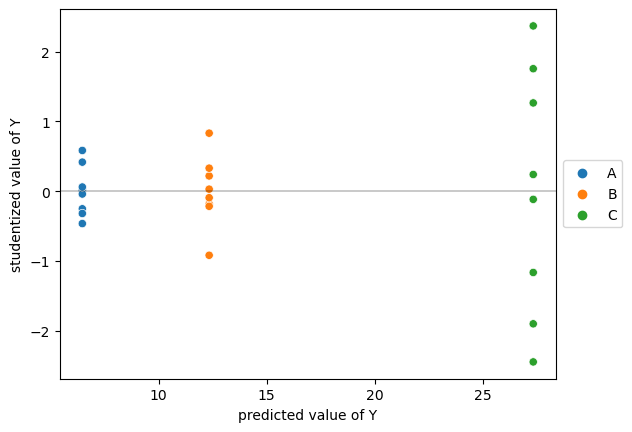

In [18]:
data['predicted'] = fit1.predict()
data['studentized_resid'] = fit1.get_influence().resid_studentized_internal

sns.scatterplot(x='predicted', y='studentized_resid', hue='treat', data=data)
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized value of Y')
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plt.show()

#### 1-3) 자료를 확인하고, 가장 효과적인 자료변환을 실시하여 분산분석을 진행하라

In [21]:
data_transformed = data
data_transformed['logy'] = np.log(data['value'])

fit2=smf.ols('logy~treat', data).fit()
sm.stats.anova_lm(fit2, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
treat,2.0,7.332016,3.666008,10.000755,0.000889
Residual,21.0,7.698035,0.366573,NaN,NaN


#### 1-4) 자료변환된 데이터에대해 다시 잔차의 산점도를 작성하여라

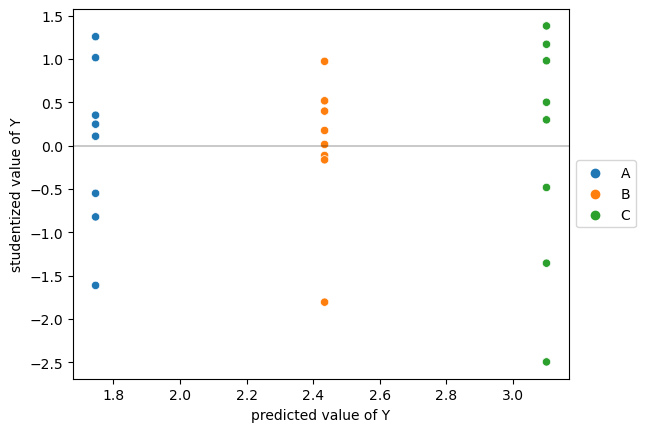

In [22]:
data['predicted'] = fit2.predict()
data['studentized_resid'] = fit2.get_influence().resid_studentized_internal

sns.scatterplot(x='predicted', y='studentized_resid', hue='treat', data=data)
plt.axhline(y=0, color="k", linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized value of Y')
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plt.show()

## 문제2
보험회사 PanDas라이프는 A,B,C 권역별 보험 판매 대리점별로 매출액에 대해 분산분석을 시행하려고 한다. 
이때, 보험 상담사의 수에 따라 매출액이 영향을 받을 수 있으므로, 이를 고려하여 분산분석을 시행하려고 한다. 
보험회사가 조사하여 얻은 아래의 데이터를 참고하여 다음 가설 검정을 수행하시오

귀무가설 : A,B,C 권역별 매출액의 평균은 모두 같다.
대립가설 : 적어도 한 권역의 평균은 다르다.

In [48]:
# <자료>

import pandas as pd

data = pd.DataFrame({
    'region': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'num_salesman': [1, 3, 2, 4, 6, 8, 7, 9, 11, 13, 12, 14],
    'sales': [10, 50, 20, 100, 200, 500, 300, 700, 1000, 1500, 1300, 1800]
})

record = data.set_index(['region', 'num_salesman'], inplace=True)
record

In [53]:
# 문제풀이
data = pd.DataFrame({
    'region': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'num_salesman': [1, 3, 2, 4, 6, 8, 7, 9, 11, 13, 12, 14],
    'sales': [10, 50, 20, 100, 200, 500, 300, 700, 1000, 1500, 1300, 1800]
})

# 자료 변환 (로그 변환 적용)
data['log_sales'] = np.log(data['sales'])

# 공분산분석 수행
fit = smf.ols('log_sales ~ num_salesman + C(region)', data=data).fit()
sm.stats.anova_lm(fit, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,7.847218,1.0,69.351608,0.000033
C(region),1.086130,2.0,4.799462,0.042699
num_salesman,3.266490,1.0,28.868364,0.000667
Residual,0.905210,8.0,NaN,NaN


#### 풀이
region의 p-value가 0.0426999로 0.05보다 작으므로, 귀무가설을 기각한다. 즉, 적어도 한 권역의 평균 매출액은 다르다.